# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [51]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merge_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")

# Display the data table for preview
merge_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [27]:
# Checking the number of mice.
mouseID_group = merge_df.groupby("Mouse ID")
print(mouseID_group["Mouse ID"].count())

Mouse ID
a203    10
a251    10
a262    10
a275    10
a366     7
        ..
z435     3
z578    10
z581    10
z795    10
z969    10
Name: Mouse ID, Length: 249, dtype: int64


In [52]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_rows_df = merge_df[merge_df.duplicated(['Mouse ID', 'Timepoint'], keep=False)]

In [53]:
# Optional: Get all the data for the duplicate mouse ID. 
print(duplicate_rows_df)

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
908           45.000000                 0  
909           45.000000                 0  
910           48.786801                 0  
911           47.570392        

In [54]:
# Checking the number of mice in the clean DataFram
value_counts = merge_df['Mouse ID'].value_counts()

## Summary Statistics

In [57]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
df = merge_df
print(df)
summary_stats = merge_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

# Rename columns for better readability
summary_stats.columns = ['Mean', 'Median', 'Variance', 'Std Deviation', 'SEM']

# Display the summary statistics table
print("Summary Statistics Table:")
print(summary_stats)

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.


     Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0        k403     Ramicane  Male          21          16          0   
1        k403     Ramicane  Male          21          16          5   
2        k403     Ramicane  Male          21          16         10   
3        k403     Ramicane  Male          21          16         15   
4        k403     Ramicane  Male          21          16         20   
...       ...          ...   ...         ...         ...        ...   
1888     z969     Naftisol  Male           9          30         25   
1889     z969     Naftisol  Male           9          30         30   
1890     z969     Naftisol  Male           9          30         35   
1891     z969     Naftisol  Male           9          30         40   
1892     z969     Naftisol  Male           9          30         45   

      Tumor Volume (mm3)  Metastatic Sites  
0              45.000000                 0  
1              38.825898                 0  
2           

In [22]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

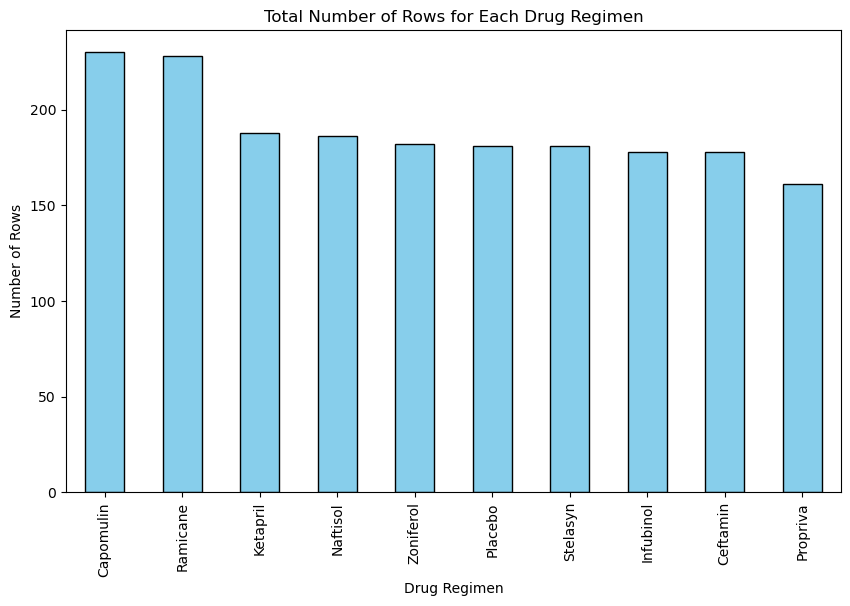

In [58]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
# Group by 'Drug Regimen' and count the number of rows for each regimen
regimen_counts = df['Drug Regimen'].value_counts()

# Plot the bar chart
regimen_counts.plot(kind='bar', color='skyblue', edgecolor='black', figsize=(10, 6))

# Set chart labels and title
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows')
plt.title('Total Number of Rows for Each Drug Regimen')

# Show the plot
plt.show()

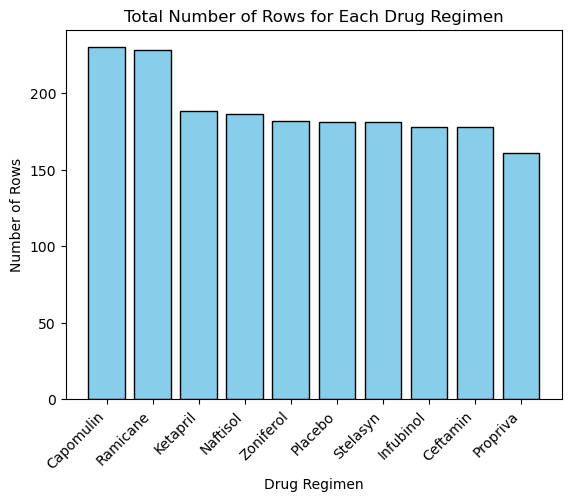

In [59]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
# Group by 'Drug Regimen' and count the number of rows for each regimen
regimen_counts = df['Drug Regimen'].value_counts()

# Plot the bar chart using pyplot
plt.bar(regimen_counts.index, regimen_counts, color='skyblue', edgecolor='black')

# Set chart labels and title
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows')
plt.title('Total Number of Rows for Each Drug Regimen')

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()

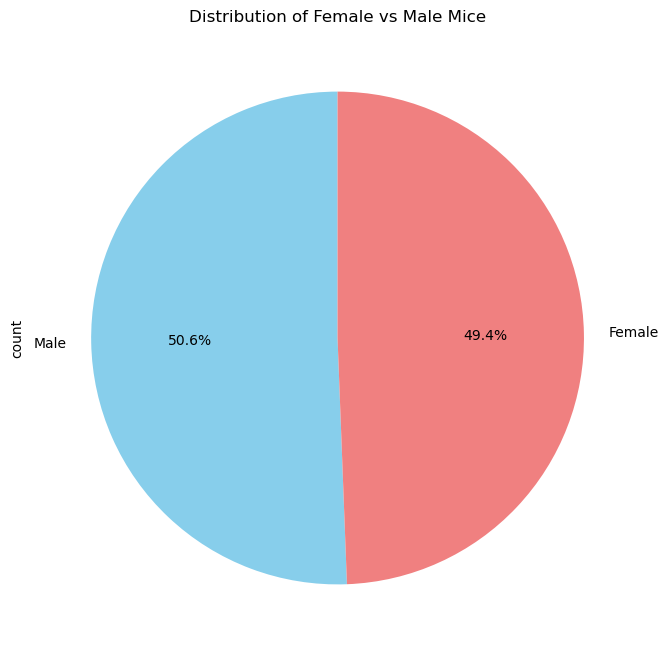

In [60]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# Count the number of male and female mice
sex_distribution = df['Sex'].value_counts()

# Plot the pie chart using pandas
sex_distribution.plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightcoral'], startangle=90, figsize=(8, 8))

# Set chart title
plt.title('Distribution of Female vs Male Mice')

# Show the plot
plt.show()

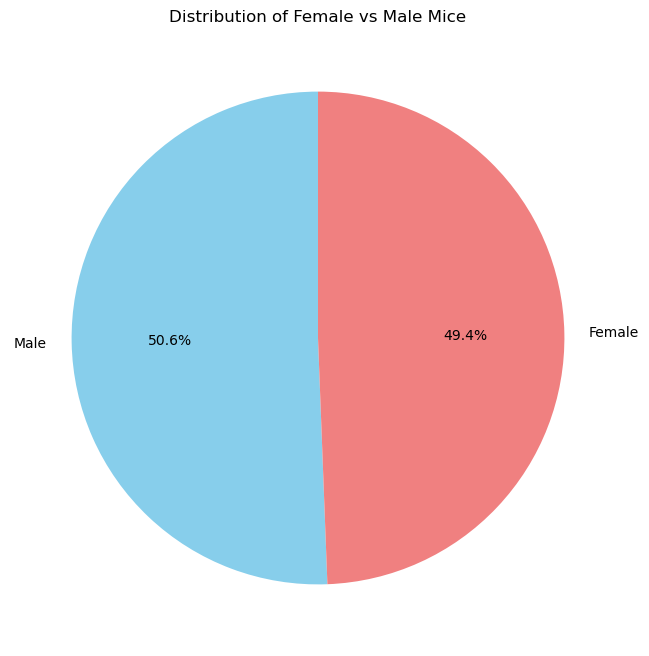

In [61]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Count the number of male and female mice
sex_distribution = df['Sex'].value_counts()

# Plot the pie chart using pyplot
plt.figure(figsize=(8, 8))
plt.pie(sex_distribution, labels=sex_distribution.index, autopct='%1.1f%%', colors=['skyblue', 'lightcoral'], startangle=90)

# Set chart title
plt.title('Distribution of Female vs Male Mice')

# Show the plot
plt.show()

## Quartiles, Outliers and Boxplots

In [64]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# List of target treatment regimens
target_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Filter the DataFrame for the target regimens
filtered_df = df[df['Drug Regimen'].isin(target_regimens)]

# Group by 'Mouse ID' and find the final tumor volume for each mouse
final_tumor_volume = filtered_df.groupby('Mouse ID')['Tumor Volume (mm3)'].last()

# Display the result
print("Final Tumor Volume for each mouse:")
print(final_tumor_volume)

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = df.groupby('Mouse ID')['Timepoint'].max()

# Display the result
print("Last Timepoint for each mouse:")
print(last_timepoint)

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_df = pd.merge(df, last_timepoint, on=['Mouse ID', 'Timepoint'], how='right')

# Display the result
print("Merged DataFrame with Tumor Volume at the Last Timepoint:")
print(merged_df)

Final Tumor Volume for each mouse:
Mouse ID
a203    67.973419
a251    65.525743
a275    62.999356
a411    38.407618
a444    43.047543
          ...    
y769    68.594745
y793    31.896238
y865    64.729837
z578    30.638696
z581    62.754451
Name: Tumor Volume (mm3), Length: 100, dtype: float64
Last Timepoint for each mouse:
Mouse ID
a203    45
a251    45
a262    45
a275    45
a366    30
        ..
z435    10
z578    45
z581    45
z795    45
z969    45
Name: Timepoint, Length: 249, dtype: int64
Merged DataFrame with Tumor Volume at the Last Timepoint:
    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
0       a203    Infubinol  Female          20          23         45   
1       a251    Infubinol  Female          21          25         45   
2       a262      Placebo  Female          17          29         45   
3       a275     Ceftamin  Female          20          28         45   
4       a366     Stelasyn  Female          16          29         30   
..       .

In [68]:
# Put treatments into a list for for loop (and later for plot labels)
# Find the unique treatments in the DataFrame
treatments = df['Drug Regimen'].unique()

# Display the list of treatments
print("List of Treatments:", treatments)

# Rest of your code, for example, using the treatments in a loop:
for treatment in treatments:
    # Perform operations or create plots for each treatment
    print(f"Processing treatment: {treatment}")
    # Your code here

# Create empty list to fill with tumor vol data (for plotting)
# Find the unique treatments in the DataFrame
treatments = df['Drug Regimen'].unique()

# Create an empty list to fill with tumor volume data for plotting
tumor_vol_data = []

# Loop through each treatment
for treatment in treatments:
    # Filter DataFrame for the current treatment
    treatment_df = df[df['Drug Regimen'] == treatment]
    
    # Find the last timepoint for each mouse in the current treatment
    last_timepoint = treatment_df.groupby('Mouse ID')['Timepoint'].max()
    
    # Merge to get the tumor volume at the last timepoint
    merged_df = pd.merge(df, last_timepoint, on=['Mouse ID', 'Timepoint'], how='right')
    
    # Append tumor volume data to the list
    tumor_vol_data.append(merged_df['Tumor Volume (mm3)'])

# Display the list of tumor volume data for each treatment
print("List of Tumor Volume Data:", tumor_vol_data)

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Find the unique treatments in the DataFrame
treatments = df['Drug Regimen'].unique()

# Create an empty list to store potential outliers
potential_outliers = []

# Loop through each treatment
for treatment in treatments:
    # Filter DataFrame for the current treatment
    treatment_df = df[df['Drug Regimen'] == treatment]
    
    # Find the last timepoint for each mouse in the current treatment
    last_timepoint = treatment_df.groupby('Mouse ID')['Timepoint'].max()
    
    # Merge to get the tumor volume at the last timepoint
    merged_df = pd.merge(df, last_timepoint, on=['Mouse ID', 'Timepoint'], how='right')
    
    # Extract tumor volume data for the current treatment
    tumor_vol_data = merged_df['Tumor Volume (mm3)']
    
    # Calculate the IQR for the current treatment
    quartiles = tumor_vol_data.quantile([0.25, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile
    
    # Define upper and lower bounds
    lower_bound = lower_quartile - 1.5 * iqr
    upper_bound = upper_quartile + 1.5 * iqr
    
    # Identify potential outliers
    outliers = tumor_vol_data[(tumor_vol_data < lower_bound) | (tumor_vol_data > upper_bound)]
    
    # Append potential outliers to the list
    potential_outliers.append({
        'Treatment': treatment,
        'Lower Bound': lower_bound,
        'Upper Bound': upper_bound,
        'Potential Outliers': outliers.tolist()
    })

# Display the results
print("Quantitative Analysis for Potential Outliers:")
for result in potential_outliers:
    print("\nTreatment:", result['Treatment'])
    print("Lower Bound:", result['Lower Bound'])
    print("Upper Bound:", result['Upper Bound'])
    print("Potential Outliers:", result['Potential Outliers'])
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
# Find the unique treatments in the DataFrame
treatments = df['Drug Regimen'].unique()

# Create an empty list to store potential outliers
potential_outliers = []

# Loop through each treatment
for treatment in treatments:
    # Filter DataFrame for the current treatment
    treatment_df = df[df['Drug Regimen'] == treatment]
    
    # Find the last timepoint for each mouse in the current treatment
    last_timepoint = treatment_df.groupby('Mouse ID')['Timepoint'].max()
    
    # Merge to get the tumor volume at the last timepoint
    merged_df = pd.merge(df, last_timepoint, on=['Mouse ID', 'Timepoint'], how='right')
    
    # Extract tumor volume data for the current treatment
    tumor_vol_data = merged_df['Tumor Volume (mm3)']
    
    # Add subset
    subset_data = {
        'Treatment': treatment,
        'Tumor Volume Data': tumor_vol_data.tolist()
    }
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_vol_data.quantile([0.25, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile
    
    lower_bound = lower_quartile - 1.5 * iqr
    upper_bound = upper_quartile + 1.5 * iqr
    
    outliers = tumor_vol_data[(tumor_vol_data < lower_bound) | (tumor_vol_data > upper_bound)]
    
    # Append information to the list
    subset_data['Lower Bound'] = lower_bound
    subset_data['Upper Bound'] = upper_bound
    subset_data['Potential Outliers'] = outliers.tolist()
    
    # Append the subset data to the list
    potential_outliers.append(subset_data)

# Display the results
print("Quantitative Analysis for Potential Outliers:")
for result in potential_outliers:
    print("\nTreatment:", result['Treatment'])
    print("Tumor Volume Data:", result['Tumor Volume Data'])
    print("Lower Bound:", result['Lower Bound'])
    print("Upper Bound:", result['Upper Bound'])
    print("Potential Outliers:", result['Potential Outliers'])
    
    # add subset 

    
    # Determine outliers using upper and lower bounds


List of Treatments: ['Ramicane' 'Capomulin' 'Infubinol' 'Placebo' 'Ceftamin' 'Stelasyn'
 'Zoniferol' 'Ketapril' 'Propriva' 'Naftisol']
Processing treatment: Ramicane
Processing treatment: Capomulin
Processing treatment: Infubinol
Processing treatment: Placebo
Processing treatment: Ceftamin
Processing treatment: Stelasyn
Processing treatment: Zoniferol
Processing treatment: Ketapril
Processing treatment: Propriva
Processing treatment: Naftisol
List of Tumor Volume Data: [0     38.407618
1     43.047543
2     38.810366
3     32.978522
4     38.342008
5     33.397653
6     37.311236
7     40.659006
8     29.128472
9     33.562402
10    36.374510
11    31.560470
12    36.134852
13    22.050126
14    30.564625
15    31.095335
16    45.220869
17    36.561652
18    37.225650
19    43.419381
20    30.276232
21    40.667713
22    43.166373
23    44.183451
24    30.638696
Name: Tumor Volume (mm3), dtype: float64, 0     38.982878
1     38.939633
2     30.485985
3     37.074024
4     40.159220
5  

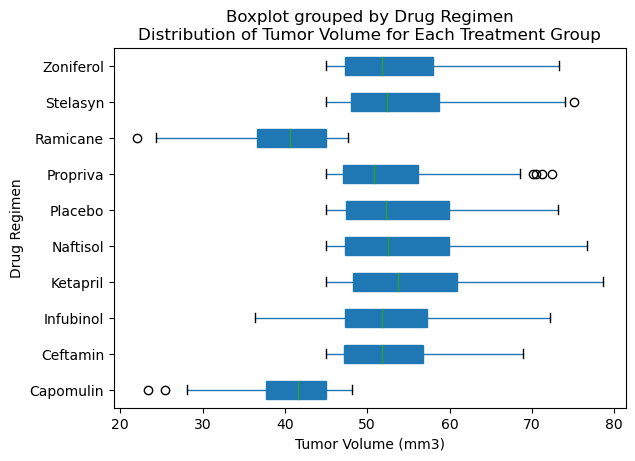

In [69]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
# Generate a box plot using pandas
df.boxplot(column='Tumor Volume (mm3)', by='Drug Regimen', grid=False, vert=False, patch_artist=True)

# Set plot labels and title
plt.xlabel('Tumor Volume (mm3)')
plt.ylabel('Drug Regimen')
plt.title('Distribution of Tumor Volume for Each Treatment Group')

# Show the plot
plt.show()

## Line and Scatter Plots

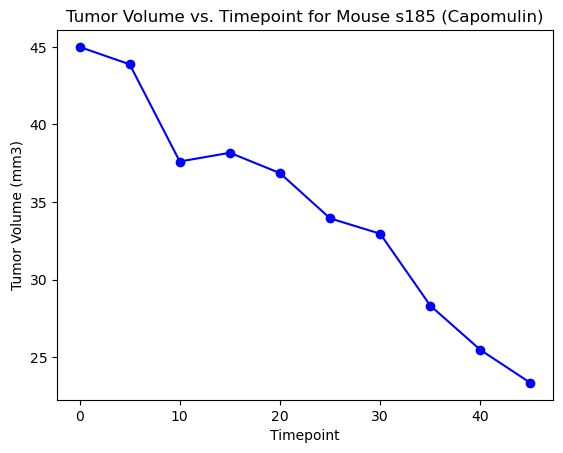

In [70]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# Choose a single mouse treated with Capomulin
mouse_id_capomulin = df[df['Drug Regimen'] == 'Capomulin']['Mouse ID'].iloc[0]

# Filter the DataFrame for the chosen mouse and Capomulin treatment
single_mouse_data = df[(df['Mouse ID'] == mouse_id_capomulin) & (df['Drug Regimen'] == 'Capomulin')]

# Generate a line plot
plt.plot(single_mouse_data['Timepoint'], single_mouse_data['Tumor Volume (mm3)'], marker='o', linestyle='-', color='b')

# Set plot labels and title
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.title(f'Tumor Volume vs. Timepoint for Mouse {mouse_id_capomulin} (Capomulin)')

# Show the plot
plt.show()

Text(0.5, 1.0, 'Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)')

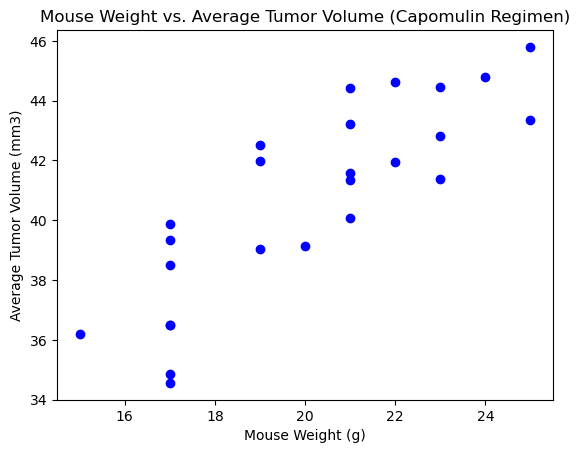

In [71]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# Filter the DataFrame for the Capomulin regimen
capomulin_data = df[df['Drug Regimen'] == 'Capomulin']

# Group by 'Mouse ID' and calculate the average observed tumor volume and weight for each mouse
average_data = capomulin_data.groupby('Mouse ID').agg({'Tumor Volume (mm3)': 'mean', 'Weight (g)': 'mean'}).reset_index()

# Generate a scatter plot
plt.scatter(average_data['Weight (g)'], average_data['Tumor Volume (mm3)'], marker='o', color='b')

# Set plot labels and title
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)')


## Correlation and Regression

In [72]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
# Filter the DataFrame for the Capomulin regimen
capomulin_data = df[df['Drug Regimen'] == 'Capomulin']

# Group by 'Mouse ID' and calculate the average observed tumor volume and weight for each mouse
average_data = capomulin_data.groupby('Mouse ID').agg({'Tumor Volume (mm3)': 'mean', 'Weight (g)': 'mean'}).reset_index()

# Calculate the correlation coefficient
correlation_coefficient, _ = pearsonr(average_data['Weight (g)'], average_data['Tumor Volume (mm3)'])
print(f"Correlation Coefficient: {correlation_coefficient}")

# Fit a linear regression model
slope, intercept, _, _, _ = linregress(average_data['Weight (g)'], average_data['Tumor Volume (mm3)'])

# Generate predicted values using the linear regression model
predicted_values = slope * average_data['Weight (g)'] + intercept

# Plot the scatter plot and the linear regression line
plt.scatter(average_data['Weight (g)'], average_data['Tumor Volume (mm3)'], marker='o', color='b', label='Actual Data')
plt.plot(average_data['Weight (g)'], predicted_values, color='r', label='Linear Regression Line')

# Set plot labels and title
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)')

# Add a legend
plt.legend()

# Show the plot
plt.show()

NameError: name 'pearsonr' is not defined